In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

In [2]:
# Load the data
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,1,2012,1,6,0.0,0.0,1055.8,32.3,324.0,13.8,57.6,28.3,fire
1,2,1,2012,2,5,1.0,0.0,1056.2,32.6,325.2,13.9,58.0,28.5,fire
2,3,1,2012,3,4,2.0,0.0,1056.6,32.9,326.4,14.0,58.4,28.7,fire
3,4,1,2012,4,3,3.0,0.0,1057.0,33.2,327.6,14.1,58.8,28.9,fire
4,5,1,2012,5,2,4.0,0.0,1057.4,33.5,328.8,14.2,59.2,29.1,fire


In [3]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert target variable to binary numeric format
df['Classes'] = df['Classes'].str.strip()
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

# Define feature set X and target y
X = df.loc[:, ['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI']]
y = df['Classes']

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# Initialize and train the Random Forest classification model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [6]:
# Save the model using pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Load the model to ensure it works correctly
with open('rf_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

In [7]:
# Predict fire occurrences
# df['predicted_fire'] = rf_model.predict(X)

# Predict fire occurrences using the loaded model from pickle
df['predicted_fire'] = loaded_rf_model.predict(X) # type: ignore

In [8]:
# Extract month from the date column
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df['month'] = df['date'].dt.month

In [9]:
# Group by month and calculate fire occurrence frequency
monthly_fire_frequency = df.groupby('month')['predicted_fire'].mean()  # Mean gives the frequency of 'fire' (1)

In [10]:
# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert month number to month name
monthly_fire_frequency.index = monthly_fire_frequency.index.map(lambda x: month_names[x - 1])

# Scale the prediction to a scale of 10
monthly_fire_frequency_scaled = (monthly_fire_frequency / monthly_fire_frequency.max()) * 10

In [11]:
# Print the monthly fire frequency
print("Monthly fire frequency prediction:")
print(monthly_fire_frequency)

Monthly fire frequency prediction:
month
January      0.250000
February     0.106195
March        0.000000
April        0.000000
May          0.000000
June         0.383333
July         0.370968
August       0.193548
September    0.058333
October      0.250000
November     0.250000
December     0.250000
Name: predicted_fire, dtype: float64


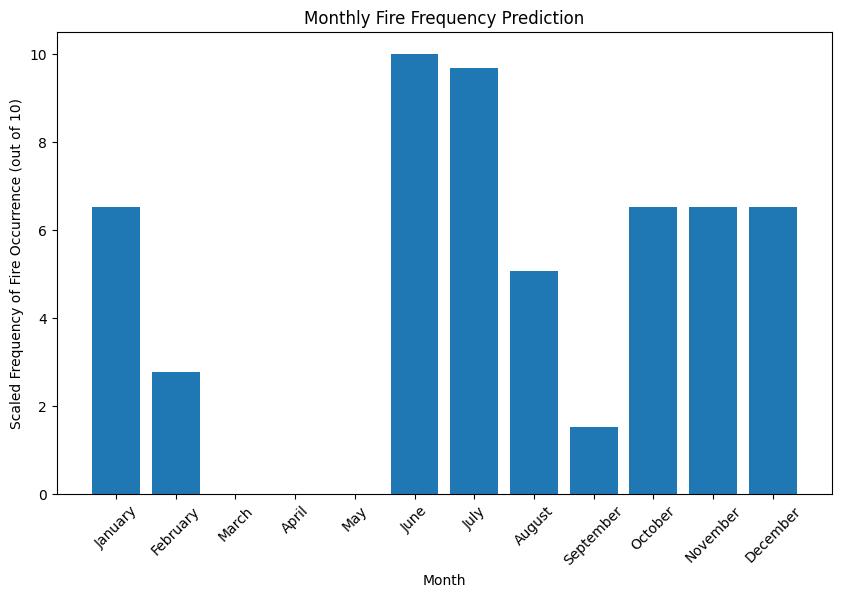

In [12]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_fire_frequency_scaled.index, monthly_fire_frequency_scaled.values)
plt.xlabel('Month')
plt.ylabel('Scaled Frequency of Fire Occurrence (out of 10)')
plt.title('Monthly Fire Frequency Prediction')
plt.xticks(rotation=45)
plt.show()

In [13]:
# threshold setting
threshold = 0.225

# Filter months where predicted fire frequency exceeds the threshold
fire_months = monthly_fire_frequency[monthly_fire_frequency > threshold].index.tolist() # type: ignore

print("Months predicted to have guaranteed fire occurrence:")
print(fire_months)

Months predicted to have guaranteed fire occurrence:
['January', 'June', 'July', 'October', 'November', 'December']
